In [100]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [101]:
data_1=pd.read_csv("final_08-19.csv")
test_data=pd.read_csv("final_2020.csv")

In [102]:
data=data_1.iloc[:,:20]
data

,team A,team B,Toss_Winner,Top Batsmen Points(Team A),Top Batsmen Points(Team B),Top Baller Points(Team A),Top Baller Points(Team B),Match Won after winning Toss Team A,Match Won after winning Toss Team B,runs in pp team a,runs in pp team b,Run Rate(Team A),Run Rate(Team B),Most Value Player Points(Team A),Most Value Player Points(Team B),Win ratio (Team A),Win ratio (Team B),Team A Ground,Team B Ground,winner
0,KKR,RCB,RCB,536,509,730,393,0.000000,0.000000,61,26,-0.147,-1.160,514.5,517.5,0.00,0.00,away,home,KKR
1,CSK,KXIP,CSK,807,804,564,538,0.000000,0.000000,53,63,-0.192,0.509,680.0,727.0,0.00,0.00,away,away,CSK
2,RR,DC,RR,642,536,571,590,0.000000,0.000000,40,55,0.632,0.342,917.0,517.5,0.00,0.00,away,away,DC
3,MI,RCB,MI,556,509,970,393,0.000000,0.000000,47,40,0.570,-1.160,724.0,517.5,0.00,0.00,home,away,RCB
4,DEC,KKR,DEC,617,536,603,730,0.000000,0.000000,39,26,-0.467,-0.147,598.0,514.5,0.00,0.00,away,home,KKR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,KKR,MI,MI,589,616,406,759,0.563218,0.555556,51,48,0.028,0.421,756.0,830.0,0.22,0.78,away,home,MI
752,CSK,MI,CSK,658,616,700,759,0.649351,0.555556,33,47,0.131,0.421,764.0,830.0,0.46,0.54,home,away,MI
753,SRH,DC,DC,610,537,661,810,0.500000,0.000000,54,56,0.577,0.044,694.5,677.0,0.67,0.33,away,away,DC
754,DC,CSK,CSK,537,658,810,700,0.000000,0.649351,42,42,0.044,0.131,677.0,764.0,0.33,0.67,away,away,CSK


In [103]:
data.isnull().sum()


team A                                 0
team B                                 0
Toss_Winner                            0
Top Batsmen Points(Team A)             0
Top Batsmen Points(Team B)             0
Top Baller Points(Team A)              0
Top Baller Points(Team B)              0
Match Won after winning Toss Team A    0
Match Won after winning Toss Team B    0
runs in pp team a                      0
runs in pp team b                      0
Run Rate(Team A)                       0
Run Rate(Team B)                       0
Most Value Player Points(Team A)       0
Most Value Player Points(Team B)       0
Win ratio (Team A)                     0
Win ratio (Team B)                     0
Team A Ground                          0
Team B Ground                          0
winner                                 4
dtype: int64

In [104]:
data= data.rename(columns = {'team A': 'A', 'team B': 'B'}, inplace = False)

In [105]:
# if Team A is winner then it encoded 0 else 1
data.winner[data.winner == data.A] = 0
data.winner[data.winner == data.B] = 1
data.Toss_Winner[data.Toss_Winner == data.A] = 0
data.Toss_Winner[data.Toss_Winner == data.B] = 1


C:\Users\91953\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\91953\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\91953\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing t

In [106]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
data['A']=LE.fit_transform(data['A'])
data['B']=LE.fit_transform(data['B'])
data['Team A Ground']=LE.fit_transform(data['Team A Ground'])
data['Team B Ground']=LE.fit_transform(data['Team B Ground'])
data.head()

,A,B,Toss_Winner,Top Batsmen Points(Team A),Top Batsmen Points(Team B),Top Baller Points(Team A),Top Baller Points(Team B),Match Won after winning Toss Team A,Match Won after winning Toss Team B,runs in pp team a,runs in pp team b,Run Rate(Team A),Run Rate(Team B),Most Value Player Points(Team A),Most Value Player Points(Team B),Win ratio (Team A),Win ratio (Team B),Team A Ground,Team B Ground,winner
0,4,9,1,536,509,730,393,0.0,0.0,61,26,-0.147,-1.160,514.5,517.5,0.0,0.0,0,1,0
1,0,6,0,807,804,564,538,0.0,0.0,53,63,-0.192,0.509,680.0,727.0,0.0,0.0,0,0,0
2,11,1,0,642,536,571,590,0.0,0.0,40,55,0.632,0.342,917.0,517.5,0.0,0.0,0,0,1
3,7,9,0,556,509,970,393,0.0,0.0,47,40,0.570,-1.160,724.0,517.5,0.0,0.0,1,0,1
4,2,4,0,617,536,603,730,0.0,0.0,39,26,-0.467,-0.147,598.0,514.5,0.0,0.0,0,1,1


In [107]:
from sklearn.preprocessing import MinMaxScaler  
scaler = MinMaxScaler()
def Normalization(Params):
    for i in Params:
        data[i]= scaler.fit_transform(pd.DataFrame(data[i])) 
Normalization(["Top Batsmen Points(Team A)","Top Batsmen Points(Team B)","Top Baller Points(Team A)","Top Baller Points(Team B)","runs in pp team a","runs in pp team b","Most Value Player Points(Team A)","Most Value Player Points(Team B)"])
data


,A,B,Toss_Winner,Top Batsmen Points(Team A),Top Batsmen Points(Team B),Top Baller Points(Team A),Top Baller Points(Team B),Match Won after winning Toss Team A,Match Won after winning Toss Team B,runs in pp team a,runs in pp team b,Run Rate(Team A),Run Rate(Team B),Most Value Player Points(Team A),Most Value Player Points(Team B),Win ratio (Team A),Win ratio (Team B),Team A Ground,Team B Ground,winner
0,4,9,1,0.2850,0.2175,0.712919,0.309809,0.000000,0.000000,0.613333,0.247619,-0.147,-1.160,0.536496,0.539625,0.00,0.00,0,1,0
1,0,6,0,0.9625,0.9550,0.514354,0.483254,0.000000,0.000000,0.506667,0.600000,-0.192,0.509,0.709072,0.758081,0.00,0.00,0,0,0
2,11,1,0,0.5500,0.2850,0.522727,0.545455,0.000000,0.000000,0.333333,0.523810,0.632,0.342,0.956204,0.539625,0.00,0.00,0,0,1
3,7,9,0,0.3350,0.2175,1.000000,0.309809,0.000000,0.000000,0.426667,0.380952,0.570,-1.160,0.754953,0.539625,0.00,0.00,1,0,1
4,2,4,0,0.4875,0.2850,0.561005,0.712919,0.000000,0.000000,0.320000,0.247619,-0.467,-0.147,0.623566,0.536496,0.00,0.00,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,4,7,1,0.4175,0.4850,0.325359,0.747608,0.563218,0.555556,0.480000,0.457143,0.028,0.421,0.788321,0.865485,0.22,0.78,0,1,1
752,0,7,0,0.5900,0.4850,0.677033,0.747608,0.649351,0.555556,0.240000,0.447619,0.131,0.421,0.796663,0.865485,0.46,0.54,1,0,1
753,12,1,1,0.4700,0.2875,0.630383,0.808612,0.500000,0.000000,0.520000,0.533333,0.577,0.044,0.724192,0.705944,0.67,0.33,0,0,1
754,1,0,1,0.2875,0.5900,0.808612,0.677033,0.000000,0.649351,0.360000,0.400000,0.044,0.131,0.705944,0.796663,0.33,0.67,0,0,1


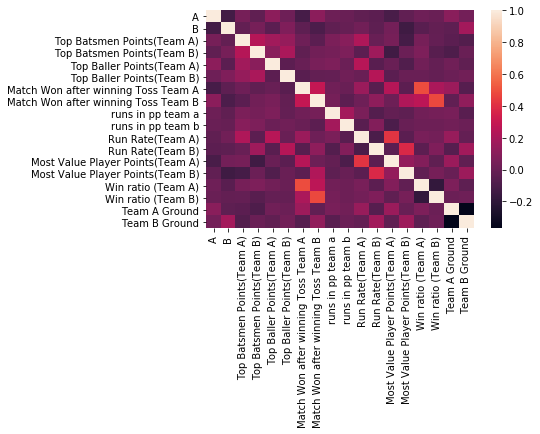

In [108]:
corr=data.corr()
sns.heatmap(corr)

In [109]:
data = data.fillna(method='bfill')
data.isnull().sum()

A                                      0
B                                      0
Toss_Winner                            0
Top Batsmen Points(Team A)             0
Top Batsmen Points(Team B)             0
Top Baller Points(Team A)              0
Top Baller Points(Team B)              0
Match Won after winning Toss Team A    0
Match Won after winning Toss Team B    0
runs in pp team a                      0
runs in pp team b                      0
Run Rate(Team A)                       0
Run Rate(Team B)                       0
Most Value Player Points(Team A)       0
Most Value Player Points(Team B)       0
Win ratio (Team A)                     0
Win ratio (Team B)                     0
Team A Ground                          0
Team B Ground                          0
winner                                 0
dtype: int64

In [135]:
from sklearn.model_selection import train_test_split
x=data[["A","B","Toss_Winner","Top Batsmen Points(Team A)","Top Batsmen Points(Team B)","Top Baller Points(Team A)","Top Baller Points(Team B)","Match Won after winning Toss Team A","Match Won after winning Toss Team B","runs in pp team a","runs in pp team b","Run Rate(Team A)","Run Rate(Team B)","Most Value Player Points(Team A)","Most Value Player Points(Team B)","Win ratio (Team A)","Win ratio (Team B)","Team A Ground","Team B Ground"]]
y=data['winner']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=3)
x_train.shape

(567, 19)

In [136]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(x_train,y_train)


C:\Users\91953\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [137]:

from sklearn import metrics
y_pred=LR.predict(x_test)
Confusion_matrix=print(metrics.confusion_matrix(y_test,y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Accuracy(train):",metrics.accuracy_score(y_train, LR.predict(x_train)))
print("F_1 Score:", metrics.f1_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))


[[55 30]
 [26 78]]
Accuracy: 0.7037037037037037
Accuracy(train): 0.6807760141093474
F_1 Score: 0.7358490566037735
Precision: 0.7222222222222222
Recall: 0.75


In [138]:
test_data


,A,B,Toss_Winner,Top Batsmen Points(Team A),Top Batsmen Points(Team B),Top Baller Points(Team A),Top Baller Points(Team B),Match Won after winning Toss Team A,Match Won after winning Toss Team B,runs in pp team a,runs in pp team b,Run Rate(Team A),Run Rate(Team B),Most Value Player Points(Team A),Most Value Player Points(Team B),Win ratio (Team A),Win ratio (Team B),Team A Ground,Team B Ground,winner
0,MI,CSK,CSK,668.8,612.2,563.4,646.6,0.571429,0.640449,42,47,0.507,0.361,696.833333,741.550000,0.61,0.39,home,away,CSK
1,DC,KXIP,KXIP,654.8,607.0,650.0,525.0,0.466667,0.432099,57,52,-0.230,-0.260,582.083333,629.875000,0.41,0.59,home,away,KXIP
2,SRH,RCB,RCB,669.6,614.0,675.8,654.0,0.500000,0.506173,53,47,0.486,-0.589,734.500000,701.416667,0.57,0.43,home,away,SRH
3,RR,CSK,RR,614.2,612.2,617.6,646.6,0.525000,0.640449,45,46,-0.093,0.361,649.850000,741.550000,0.33,0.67,home,away,CSK
4,KKR,MI,MI,583.4,668.8,618.0,563.4,0.576087,0.571429,42,45,0.600,0.507,668.041667,696.833333,0.24,0.76,home,away,MI
5,KXIP,RCB,RCB,607.0,614.0,525.0,654.0,0.432099,0.506173,47,48,-0.260,-0.589,629.875000,701.416667,0.50,0.50,home,away,RCB
6,CSK,DC,CSK,612.2,654.8,646.6,650.0,0.640449,0.466667,44,48,0.361,-0.230,741.550000,582.083333,0.67,0.33,home,away,CSK
7,KKR,SRH,KKR,583.4,669.6,618.0,675.8,0.576087,0.500000,46,49,0.600,0.486,668.041667,734.500000,0.59,0.41,home,away,SRH
8,RR,KXIP,RR,614.2,607.0,617.6,525.0,0.525000,0.432099,50,45,-0.093,-0.260,649.850000,629.875000,0.43,0.47,home,away,KXIP
9,RCB,MI,RCB,614.0,668.8,654.0,563.4,0.506173,0.571429,44,46,-0.589,0.507,701.416667,696.833333,0.36,0.64,home,away,MI


In [139]:
test_data = test_data.rename(columns = {'team A': 'A', 'team B': 'B'}, inplace = False)
test_data.Toss_Winner[test_data.Toss_Winner == test_data.A] = 0
test_data.Toss_Winner[test_data.Toss_Winner == test_data.B] = 1
test_data.A[test_data.A == "CSK"] = 0 
test_data.A[test_data.A == "DC"] = 1
test_data.A[test_data.A == "DEC"] = 2
test_data.A[test_data.A == "GL"] = 3
test_data.A[test_data.A == "KKR"] = 4
test_data.A[test_data.A == "KTK"] = 5
test_data.A[test_data.A == "KXIP"] = 6
test_data.A[test_data.A == "MI"] = 7
test_data.A[test_data.A == "PWI"] = 8
test_data.A[test_data.A == "RCB"] = 9
test_data.A[test_data.A == "RPS"] = 10
test_data.A[test_data.A == "RR"] = 11
test_data.A[test_data.A == "SRH"] = 12
test_data.B[test_data.B == "CSK"] = 0 
test_data.B[test_data.B == "DC"] = 1
test_data.B[test_data.B == "DEC"] = 2
test_data.B[test_data.B == "GL"] = 3
test_data.B[test_data.B == "KKR"] = 4
test_data.B[test_data.B == "KTK"] = 5
test_data.B[test_data.B == "KXIP"] = 6
test_data.B[test_data.B == "MI"] = 7
test_data.B[test_data.B == "PWI"] = 8
test_data.B[test_data.B == "RCB"] = 9
test_data.B[test_data.B == "RPS"] = 10
test_data.B[test_data.B == "RR"] = 11
test_data.B[test_data.B == "SRH"] = 12

test_data['Team A Ground']=1
test_data['Team B Ground']=0

scaler = MinMaxScaler()
def Normalization(Params):
    for i in Params:
        test_data[i]= scaler.fit_transform(pd.DataFrame(test_data[i])) 
Normalization(["Top Batsmen Points(Team A)","Top Batsmen Points(Team B)","Top Baller Points(Team A)","Top Baller Points(Team B)","runs in pp team a","runs in pp team b","Most Value Player Points(Team A)","Most Value Player Points(Team B)"])

C:\Users\91953\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\91953\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\91953\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing t

C:\Users\91953\anaconda3\lib\site-packages\ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [140]:
test_data.to_csv('normalized_2020.csv')
test_data

,A,B,Toss_Winner,Top Batsmen Points(Team A),Top Batsmen Points(Team B),Top Baller Points(Team A),Top Baller Points(Team B),Match Won after winning Toss Team A,Match Won after winning Toss Team B,runs in pp team a,runs in pp team b,Run Rate(Team A),Run Rate(Team B),Most Value Player Points(Team A),Most Value Player Points(Team B),Win ratio (Team A),Win ratio (Team B),Team A Ground,Team B Ground,winner
0,7,0,1,0.990719,0.334107,0.254642,0.806366,0.571429,0.640449,0.181818,0.783333,0.507,0.361,0.719586,1.000000,0.61,0.39,1,0,CSK
1,1,6,1,0.828306,0.273782,0.828912,0.000000,0.466667,0.432099,0.863636,0.866667,-0.230,-0.260,0.000000,0.299697,0.41,0.59,1,0,KXIP
2,12,9,1,1.000000,0.354988,1.000000,0.855438,0.500000,0.506173,0.681818,0.783333,0.486,-0.589,0.955790,0.748328,0.57,0.43,1,0,SRH
3,11,0,0,0.357309,0.334107,0.614058,0.806366,0.525000,0.640449,0.318182,0.766667,-0.093,0.361,0.424958,1.000000,0.33,0.67,1,0,CSK
4,4,7,1,0.000000,0.990719,0.616711,0.254642,0.576087,0.571429,0.181818,0.750000,0.600,0.507,0.539036,0.719586,0.24,0.76,1,0,MI
5,6,9,1,0.273782,0.354988,0.000000,0.855438,0.432099,0.506173,0.409091,0.800000,-0.260,-0.589,0.299697,0.748328,0.50,0.50,1,0,RCB
6,0,1,0,0.334107,0.828306,0.806366,0.828912,0.640449,0.466667,0.272727,0.800000,0.361,-0.230,1.000000,0.000000,0.67,0.33,1,0,CSK
7,4,12,0,0.000000,1.000000,0.616711,1.000000,0.576087,0.500000,0.363636,0.816667,0.600,0.486,0.539036,0.955790,0.59,0.41,1,0,SRH
8,11,6,0,0.357309,0.273782,0.614058,0.000000,0.525000,0.432099,0.545455,0.750000,-0.093,-0.260,0.424958,0.299697,0.43,0.47,1,0,KXIP
9,9,7,0,0.354988,0.990719,0.855438,0.254642,0.506173,0.571429,0.272727,0.766667,-0.589,0.507,0.748328,0.719586,0.36,0.64,1,0,MI


In [141]:
LR.fit(x,y)
z=test_data[["A","B","Toss_Winner","Top Batsmen Points(Team A)","Top Batsmen Points(Team B)","Top Baller Points(Team A)","Top Baller Points(Team B)","Match Won after winning Toss Team A","Match Won after winning Toss Team B","runs in pp team a","runs in pp team b","Run Rate(Team A)","Run Rate(Team B)","Most Value Player Points(Team A)","Most Value Player Points(Team B)","Win ratio (Team A)","Win ratio (Team B)","Team A Ground","Team B Ground"]]
y_prediction=LR.predict(z)

C:\Users\91953\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [142]:
test_data=pd.read_csv("final_2020.csv")
test_data['winner']=y_prediction
test_data.head()

,team A,team B,Toss_Winner,Top Batsmen Points(Team A),Top Batsmen Points(Team B),Top Baller Points(Team A),Top Baller Points(Team B),Match Won after winning Toss Team A,Match Won after winning Toss Team B,runs in pp team a,runs in pp team b,Run Rate(Team A),Run Rate(Team B),Most Value Player Points(Team A),Most Value Player Points(Team B),Win ratio (Team A),Win ratio (Team B),Team A Ground,Team B Ground,winner
0,MI,CSK,CSK,668.8,612.2,563.4,646.6,0.571429,0.640449,42,47,0.507,0.361,696.833333,741.550000,0.61,0.39,home,away,1
1,DC,KXIP,KXIP,654.8,607.0,650.0,525.0,0.466667,0.432099,57,52,-0.230,-0.260,582.083333,629.875000,0.41,0.59,home,away,1
2,SRH,RCB,RCB,669.6,614.0,675.8,654.0,0.500000,0.506173,53,47,0.486,-0.589,734.500000,701.416667,0.57,0.43,home,away,0
3,RR,CSK,RR,614.2,612.2,617.6,646.6,0.525000,0.640449,45,46,-0.093,0.361,649.850000,741.550000,0.33,0.67,home,away,1
4,KKR,MI,MI,583.4,668.8,618.0,563.4,0.576087,0.571429,42,45,0.600,0.507,668.041667,696.833333,0.24,0.76,home,away,1


In [143]:
test_data = test_data.rename(columns = {'team A': 'A', 'team B': 'B'}, inplace = False)
test_data.winner[test_data.winner == 0] = test_data.A
test_data.winner[test_data.winner == 1] = test_data.B

C:\Users\91953\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [144]:
test_data.to_csv('final_prediction.csv')

PermissionError: [Errno 13] Permission denied: 'final_prediction.csv'

In [145]:
test_data

,A,B,Toss_Winner,Top Batsmen Points(Team A),Top Batsmen Points(Team B),Top Baller Points(Team A),Top Baller Points(Team B),Match Won after winning Toss Team A,Match Won after winning Toss Team B,runs in pp team a,runs in pp team b,Run Rate(Team A),Run Rate(Team B),Most Value Player Points(Team A),Most Value Player Points(Team B),Win ratio (Team A),Win ratio (Team B),Team A Ground,Team B Ground,winner
0,MI,CSK,CSK,668.8,612.2,563.4,646.6,0.571429,0.640449,42,47,0.507,0.361,696.833333,741.550000,0.61,0.39,home,away,CSK
1,DC,KXIP,KXIP,654.8,607.0,650.0,525.0,0.466667,0.432099,57,52,-0.230,-0.260,582.083333,629.875000,0.41,0.59,home,away,KXIP
2,SRH,RCB,RCB,669.6,614.0,675.8,654.0,0.500000,0.506173,53,47,0.486,-0.589,734.500000,701.416667,0.57,0.43,home,away,SRH
3,RR,CSK,RR,614.2,612.2,617.6,646.6,0.525000,0.640449,45,46,-0.093,0.361,649.850000,741.550000,0.33,0.67,home,away,CSK
4,KKR,MI,MI,583.4,668.8,618.0,563.4,0.576087,0.571429,42,45,0.600,0.507,668.041667,696.833333,0.24,0.76,home,away,MI
5,KXIP,RCB,RCB,607.0,614.0,525.0,654.0,0.432099,0.506173,47,48,-0.260,-0.589,629.875000,701.416667,0.50,0.50,home,away,RCB
6,CSK,DC,CSK,612.2,654.8,646.6,650.0,0.640449,0.466667,44,48,0.361,-0.230,741.550000,582.083333,0.67,0.33,home,away,CSK
7,KKR,SRH,KKR,583.4,669.6,618.0,675.8,0.576087,0.500000,46,49,0.600,0.486,668.041667,734.500000,0.59,0.41,home,away,SRH
8,RR,KXIP,RR,614.2,607.0,617.6,525.0,0.525000,0.432099,50,45,-0.093,-0.260,649.850000,629.875000,0.43,0.47,home,away,KXIP
9,RCB,MI,RCB,614.0,668.8,654.0,563.4,0.506173,0.571429,44,46,-0.589,0.507,701.416667,696.833333,0.36,0.64,home,away,MI


In [146]:
csk=0
mi=0
kxip=0
dc=0
srh=0
rcb=0
rr=0
kkr=0
for i in test_data.winner:
    if(i=="CSK"):
        csk=csk+2
    if(i=="MI"):
        mi=mi+2    
    if(i=="KXIP"):
        kxip=kxip+2    
    if(i=="DC"):
        dc=dc+2
    if(i=="SRH"):
        srh=srh+2
    if(i=="RCB"):
        rcb=rcb+2
    if(i=="RR"):
        rr=rr+2
    if(i=="KKR"):
        kkr=kkr+2    
print("csk",csk)
print("mi",mi)
print("srh",srh)
print("kxip",kxip)
print("rr",rr)
print("rcb",rcb)
print("dc",dc)
print("kkr",kkr)


csk 18
mi 20
srh 26
kxip 10
rr 8
rcb 4
dc 12
kkr 14
